# -------------------------------Experiment - 05------------------------------------

# a) Consider the titanic dataset and handle the missing values using different methods.

In [2]:
# import the libraris

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# read csv file

df=pd.read_csv("C:/Users/mehta/AIML-20CS51I/DataSets/titanic.csv")
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
# Show the missing values

df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
# Using Mean value fill the age column

mean=df['age'].mean()
mean

29.69911764705882

In [6]:
df['age']=df['age'].fillna(mean)

In [7]:
# Using Mode value fill the deck column 

mode=df['deck'].mode()
mode

0    C
Name: deck, dtype: object

In [8]:
df['deck']=df['deck'].fillna(mode)[0]

In [9]:
# Using Mode value fill the embarked column 

me=df['embarked'].mode()
me

0    S
Name: embarked, dtype: object

In [10]:
df['embarked']=df['embarked'].fillna(me)[0]

In [11]:
# dropping rows which have null values

df.dropna(inplace=True,axis=0)

In [12]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

# b) Consider the titanic dataset and detect the outliers and handle the outliers.

In [13]:
# import the libraris

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# read csv file

df=pd.read_csv("C:/Users/mehta/AIML-20CS51I/DataSets/titanic.csv")
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


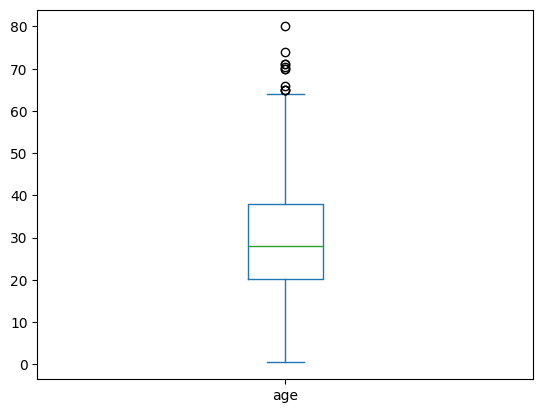

In [15]:
# Check the outlairs 

df['age'].plot(kind='box')
plt.show()

33     66.0
54     65.0
96     71.0
116    70.5
280    65.0
456    65.0
493    71.0
630    80.0
672    70.0
745    70.0
851    74.0
Name: age, dtype: float64


<Axes: >

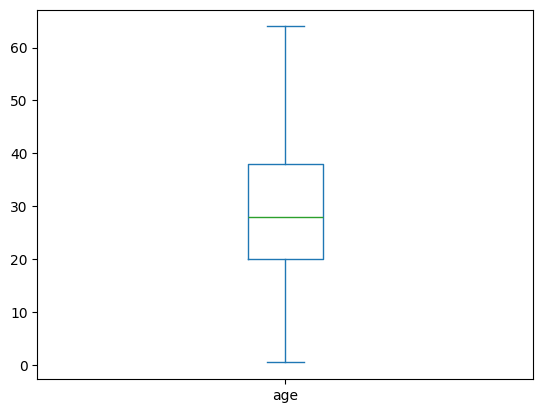

In [16]:
# Fill the outliers using IQR method 

q1=df['age'].quantile(0.25)
q3=df['age'].quantile(0.75) 

iqr=q3-q1 

upper_bound=q3+(1.5*iqr)
lower_bound=q1-(1.5*iqr) 

a_arr=df['age']
out=a_arr[(a_arr<=lower_bound) | (a_arr>=upper_bound)]
print(out) 

age_arr=df['age']
low_cap=np.percentile(age_arr,1)
up_cap=np.percentile(age_arr,99) 

for i in df['age']:
     if i<lower_bound:
         df['age']=df['age'].replace (i,low_cap)
     elif i > upper_bound:
         df['age']=df['age'].replace (i,up_cap) 

df['age'].plot (kind='box')

<Axes: >

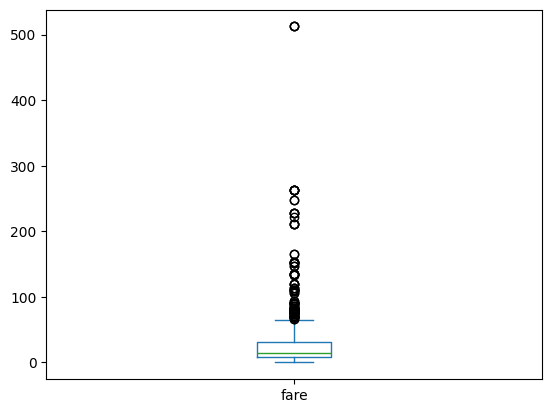

In [17]:
# Check the outlairs 

df['fare'].plot(kind='box')

Final shape of dataset after removing Fare outliers: (745, 15)


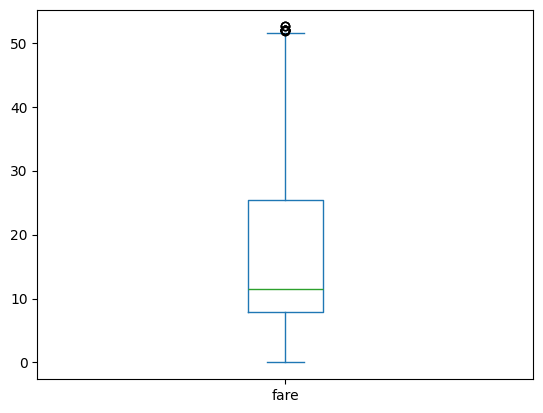

In [22]:
# Delete the outliers

q1=df['fare'].quantile(0.25)
q3=df['fare'].quantile(0.75) 

iqr=q3-q1 

upper_bound=q3+(1.5*iqr)
lower_bound=q1-(1.5*iqr) 

df = df[(df['fare'] >= lower_bound) & (df['fare'] <= upper_bound)]
df['fare'].plot(kind='box')

print("Final shape of dataset after removing Fare outliers:", df.shape)

<Axes: >

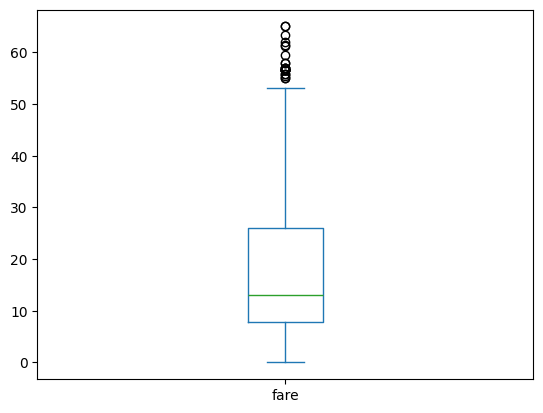

In [19]:
df['fare'].plot(kind='box')

In [9]:
#df['parch'].plot(kind='box')

In [16]:
# Using Forword fill 

#df['parch'] = df['parch'].fillna(method='ffill')